In [57]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import matplotlib.animation as animation
import glob, re
import scienceplots

import scipy.sparse as sp
import scipy.sparse.linalg as spla


hx = 0.2
(0.0, 0) -> (0.0, 1.0)
(0.2, 0) -> (0.2, 1.0)
(0.4, 0) -> (0.4, 1.0)
(0.6, 0) -> (0.6, 1.0)
(0.8, 0) -> (0.8, 1.0)
(1.0, 0) -> (1.0, 1.0)


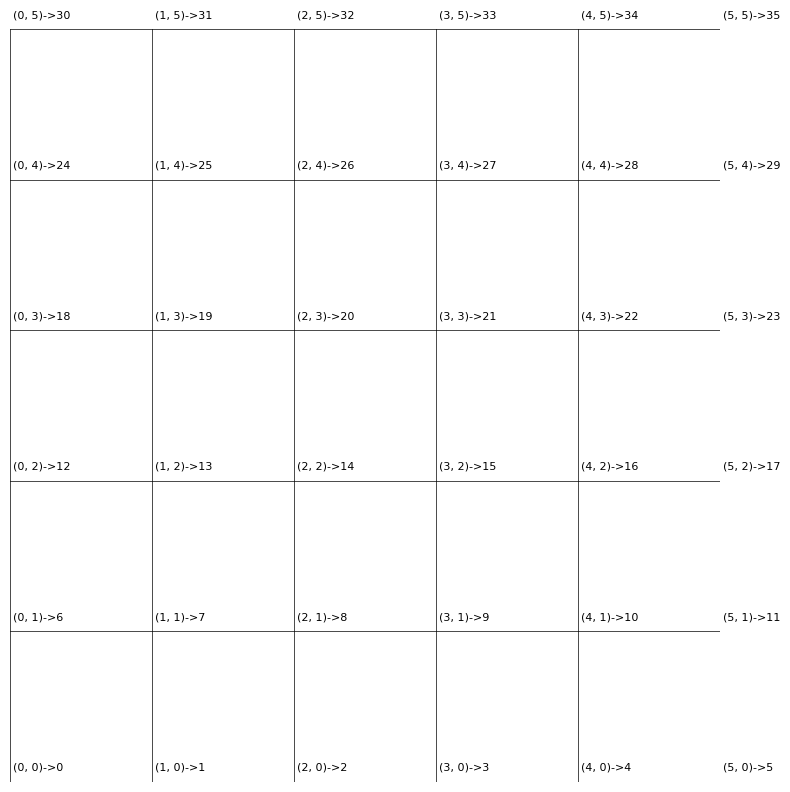

In [145]:
# Show grid lines and ticks

Lx = 1.0
Ly = 1.0
Nx = 5
Ny = 5

hx = Lx/Nx
print(f'hx = {hx}')


fig, ax = plt.subplots(figsize=(8, 8))
for i in range(Nx+1):
    ax.axvline((1.0*i)/Nx*Lx, color='k', lw=0.5)
    print(f'({i/Nx*Lx}, 0) -> ({i/Nx*Lx}, {Ly})')
for j in range(Ny+1):
    ax.axhline(j/Ny*Ly, color='k', lw=0.5)
# ax.set_xticks(np.linspace(0, Lx, Nx+1))
# ax.set_yticks(np.linspace(0, Ly, Ny+1))
# ax.set_xlim(0, Lx)
# ax.set_ylim(0, Ly)
# ax.set_xlabel(r'$x$')
# ax.set_ylabel(r'$y$')
# ax.set_aspect('equal')
ax.set_axis_off()
# Show node numbering
delta_x = 0.004
delta_y = 0.02
for i in range(Nx+1):
    for j in range(Ny+1):
        ax.text(i/Nx*Lx+delta_x, j/Ny*Ly+delta_y, f'({i}, {j})->{i+j*(Nx+1)}', ha='left', va='center', fontsize=8)

fig.tight_layout()
plt.show()

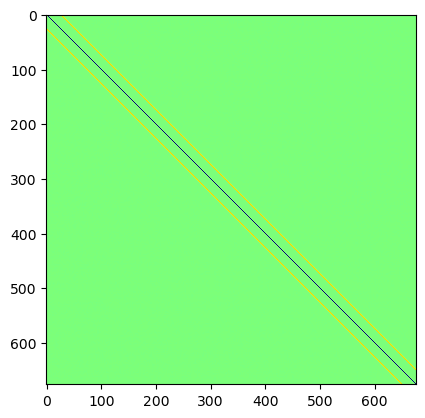

In [170]:
Lx = 1.0
Ly = 1.0
Nx = Ny = 25

hx = Lx / (Nx-1)
hy = Ly / (Ny-1)

# Matrix assembly for 5-point stencil '(Nx+1)*(Ny+1)' grid points.
A = sp.diags([1, 1, -4, 1, 1], [-Nx-1, -1, 0, 1, Nx+1], shape=((Nx+1)*(Ny+1), (Nx+1)*(Ny+1)), format='csr') 

# A[0, Nx*Nx-1] = -40

plt.imshow(A.todense(), vmin=-1, vmax=1, cmap='jet')


Shape of A: (676, 676)
Shape of b: (676,)
Nb elements on boundary: 100


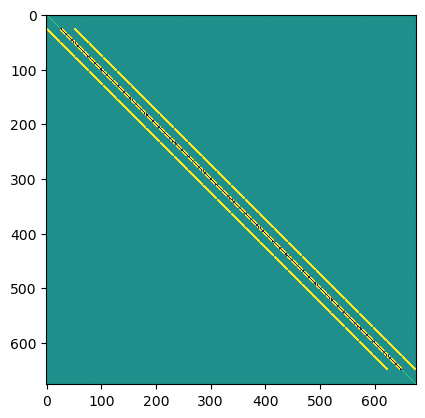

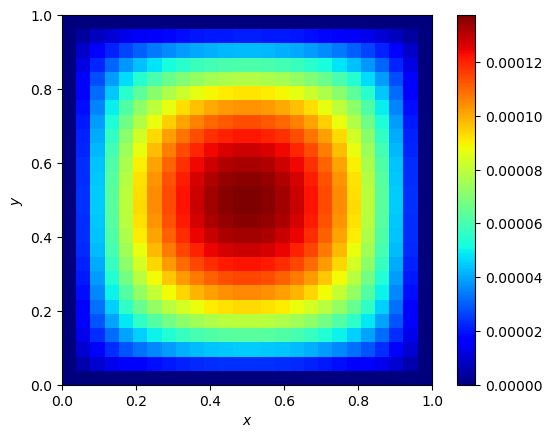

U min: 0.000
U max: 0.000


In [174]:
A = sp.diags([1, 1, -4, 1, 1], [-Nx-1, -1, 0, 1, Nx+1], shape=((Nx+1)*(Ny+1), (Nx+1)*(Ny+1)), format='csr') / (hx*hx)


print(f"Shape of A: {A.shape}")
def fxy(x, y):
    return -1.0

# RHS assembly with forcing function f(x, y).
b = np.zeros((Nx+1)*(Ny+1))
for i in range(Nx):
    for j in range(Ny):
        b[i*Nx+j] = fxy((i+0.5)*hx, (j+0.5)*hy) * hx*hx

print(f"Shape of b: {b.shape}")

Nb = 0
x = 0


# Dirichlet boundary conditions = 0
for idx_x in range(Nx+1):
    for idx_y in range(Ny+1):
        if idx_x == 0 or idx_x == Nx or idx_y == 0 or idx_y == Ny:
            Nb += 1
            x = idx_x * (Ny+1) + idx_y
            A[x, :] = 0.0
            A[x, x] = 1.0
            b[x] = 0.0



print(f'Nb elements on boundary: {Nb}')

# # Neumann boundary conditions on right 
# for idx_y in range(Ny):
#     line_idx = (idx_y + 1) * Nx 
#     # print(f'Neumann node: ({line_idx})')
#     idx_Y2 = Nx 
#     a = A[line_idx, line_idx-1]
#     b[line_idx] = fxy((line_idx+0.5)*hx, (idx_y+0.5)*hy) - 2.0 * hx * 5.0 
#     print(f'Value of A[{line_idx}, {line_idx-1}]: {a}')
#     # print(f'Value of A[{line_idx},:]: {A[line_idx,:]}')
#     # A[line_idx, idx_Y2] = 2.0


# Dirichlet boundary conditions on lef


plt.imshow(A.todense(), vmin=-1, vmax=1)

# Solve linear system
u = spla.spsolve(A, b).reshape((Nx+1, Ny+1))

# Plot solution
fig, ax = plt.subplots()
im = ax.imshow(u, origin='lower', extent=[0, Lx, 0, Ly], cmap='jet')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_aspect('equal')
fig.colorbar(im, ax=ax)
plt.show()
# Min max
print(f'U min: {u.min():.3f}')
print(f'U max: {u.max():.3f}')




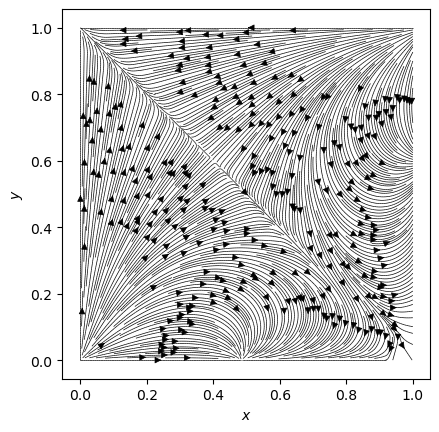

In [173]:
# Streamlines
x = np.linspace(0, Lx, Nx+1)
y = np.linspace(0, Ly, Ny+1)
X, Y = np.meshgrid(x, y)
U, V = np.gradient(u, hx, hy)
fig, ax = plt.subplots()
ax.streamplot(X, Y, U, V, color='k', linewidth=0.5, density=5)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_aspect('equal')